### **Feature Engineering**

*   Exploratory Data Analysis
*   Missing Values
*   Numeric Features
*   Categorical Features
*   Date Time Features











**Import Packages**

In [0]:
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data


In [0]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X_full, Y_full = dataset.data, dataset.target

In [0]:
columns_list = ['avg_house_price'] #target name
columns_list.extend(dataset.feature_names)

dataframe = np.column_stack((Y_full, X_full))

df = pd.DataFrame(data = dataframe, columns = columns_list)
df

,avg_house_price,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,0.781,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


**Exploratory Data Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c98d26fd0>,
      dtype=object)

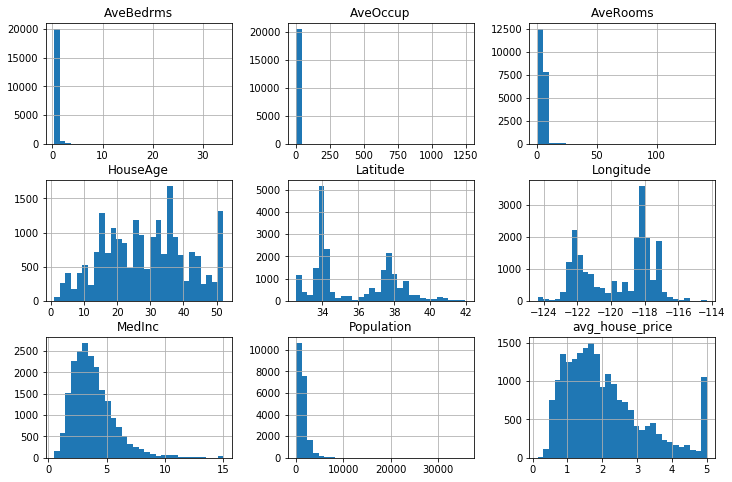

In [0]:
#Generating features through EDA? specifically?
df.hist(bins=30, figsize=(12,8))

In [0]:
def df_describe(df):
  df_described = pd.concat([df.describe(),df.mode(dropna=False)])
  return df_described.rename(index = {0: 'mode', 1:'any mode ties'}) 

df_describe(df)
#NaN is if there were no ties in the mode

,avg_house_price,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.149990,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000
mode,5.000010,3.125000,52.000000,5.000000,1.000000,891.000000,3.000000,34.060000,-118.310000
any mode ties,NaN,15.000100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Missing Data**

Examples of missing values: NANs, empty strings, possibly anomalies in histograms (outliers, extreme spikes in a value within the histogram)
 

In [0]:
df_withNAs = df.replace(to_replace = 41.0, value = np.NaN)
df_withNAs

,avg_house_price,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,NaN,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,0.781,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


General approach

In [0]:
def df_fillna(df, replace_from = 'NaN', replace_method = 'Median'):
  if replace_from != 'NaN':
    df = df.replace(replace_from, np.nan)
  if replace_method == 'Median': #if data are stationary, robust to outliers
    df_imputed = df.fillna(df.median())
  if replace_method == 'Mean': #if data are stationary
    df_imputed = df.fillna(df.mean())
  if replace_method == 'PreviousValue': #if data are autocorrelated
    df_imputed = df.fillna(method='ffill')
  if replace_method == 'TreeBasedMethods': #tree methods might be able to make a split according to the missing values so make it a separate category and keep information in a numerical format
    df_imputed = df.fillna(df.min - 1)


Replacing with summary statistic based on a cluster/group of features

In [0]:
"""
#e.g replace NaN house value based on mean house values of a specific geographical area
v = df.set_index(['MedInc', 'HouseAge'])['AveRooms'].replace(0, np.nan)
df = v.fillna(v.mean(level=[0, 1])).reset_index()
#https://stackoverflow.com/questions/48144828/how-to-replace-certain-values-in-a-pandas-column-with-the-mean-column-value-of-s
"""

"\n#e.g replace NaN house value based on mean house values of a specific geographical area\nv = df.set_index(['MedInc', 'HouseAge'])['AveRooms'].replace(0, np.nan)\ndf = v.fillna(v.mean(level=[0, 1])).reset_index()\n#https://stackoverflow.com/questions/48144828/how-to-replace-certain-values-in-a-pandas-column-with-the-mean-column-value-of-s\n"

**Numeric Features**


Preprocessing (for Linear-based models: Regression, K-NN, NN etc.)



In [0]:
#Add a method that removes according to Z-score or IQR (https://www.kdnuggets.com/2018/08/make-machine-learning-models-robust-outliers.html)
#Put winsorization in this function?

def scale_df(df, method = 'MinMax', powerTransform = 'yeo-johnson', winsorization_Lowerbound = 0.01, winsorization_UpperBound = 0.99):
  if method == 'MinMax': #[0,1] scaling
    X_scaled = sklearn.preprocessing.MinMaxScaler().fit_transform(df) 
  elif method == 'Standardization': # μ = 0, σ = 1
    X_scaled = sklearn.preprocessing.StandardScaler().fit_transform(df) 
  elif method == 'RobustScaler': #outlier robust (uses median and IQR)
    X_scaled = sklearn.preprocessing.RobustScaler().fit_transform(df)
  elif method == 'PowerTransform': #Gaussian-like
    X_scaled = sklearn.preprocessing.power_transform(df, method=powerTransform, standardize=True, copy=True) #methods: 'yeo-johnson' (-ve and +ve values), 'box-cox' (+ve values)
  elif method == 'MaxAbs': #for sparse data
    X_scaled = sklearn.preprocessing.MaxAbsScaler().fit_transform(df)

  df_scaled = pd.DataFrame(X_scaled, df.index, df.columns)
  return df_scaled



#Other Transforms
"""
- #Rank Transform - need to apply to both train and test?
df_rank = df.rank()

- #Log and sqrt transforms
df_log_transform = df.transform(lambda x: np.log(1 + x))
df_sqrt_transform = df.transform(lambda x: np.sqrt(x + (2/3)))
"""


'\n#Rank Transform - need to apply to both train and test?\ndf_rank = df.rank()\n\n#Log and sqrt transforms\ndf_log_transform = df.transform(lambda x: np.log(1 + x))\ndf_sqrt_transform = df.transform(lambda x: np.sqrt(x + (2/3)))\n'

In [0]:
#WINSORIZATION
df_winsorized = df.clip(lower=df.quantile(0.01), upper=df.quantile(0.99), axis=1)

#Winsorize specific columns
"""
cols = ['value', 'another col']
df[cols] = dfo[cols].clip(lower=df[cols].quantile(0.01), upper=df[cols].quantile(0.99), axis=1)
"""

Testing Preprocessing methods

In [0]:
df_powerTransform = scale_df(df, method='PowerTransform')
df_powerTransform_scaled = scale_df(df_powerTransform, method = 'MinMax')
df_powerTransform_scaled.describe()

,avg_house_price,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.612220,0.522716,0.586284,0.533867,0.850604,0.378034,0.518865,0.465935,0.413482
std,0.204252,0.151688,0.234937,0.069193,0.035137,0.083480,0.080596,0.256579,0.190469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461502,0.420946,0.393554,0.494850,0.833870,0.330455,0.472198,0.266733,0.202279
50%,0.608929,0.525900,0.603265,0.538455,0.848556,0.375230,0.521082,0.320625,0.509972
75%,0.756939,0.623997,0.746285,0.575679,0.863993,0.424132,0.568388,0.730706,0.561254
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75e52c2940>,
      dtype=object)

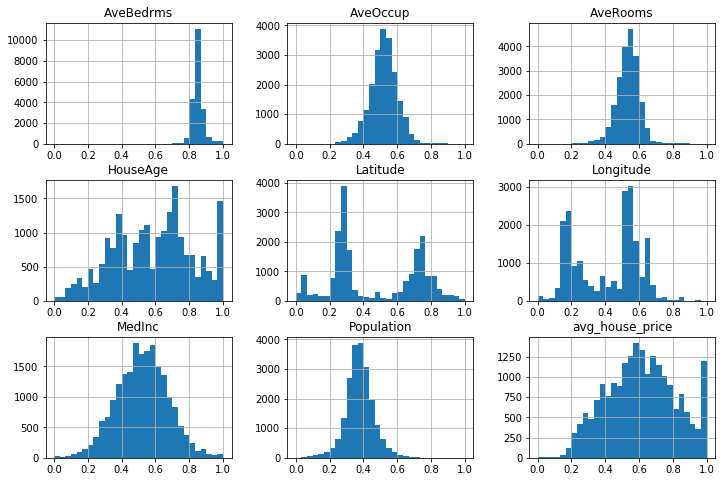

In [0]:
df_powerTransform_scaled.hist(bins = 30, figsize=(12,8))


Text(0.5, 1.0, 'Boxplot of powertransformed (Gaussian) and scaled (Standardization) data')

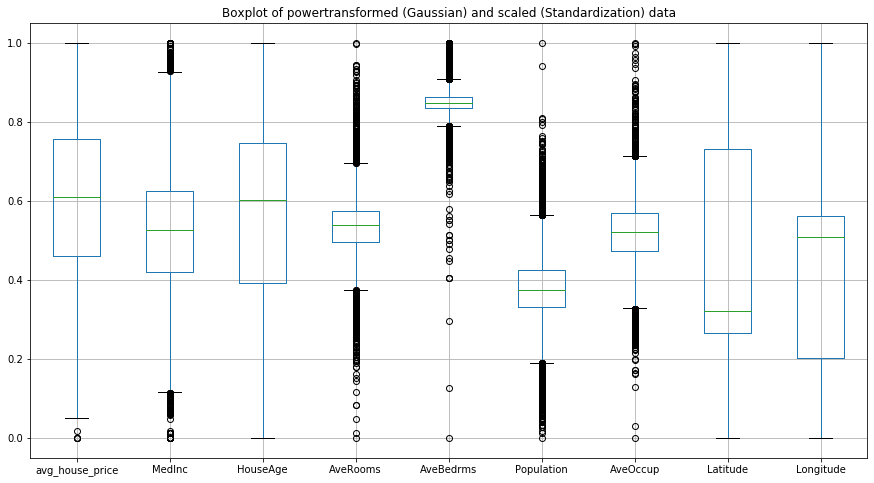

In [0]:
df_powerTransform_scaled.boxplot(figsize = (15,8))
plt.title("Boxplot of powertransformed (Gaussian) and scaled (Standardization) data")

#whiskers: 1.5*IQR + 3rd quartile or 1st quartile - .15* IQR (suspected outliers), 3*IQR (outliers)

Text(0.5, 1.0, 'Winsorized data (after power transform and standardisation)')

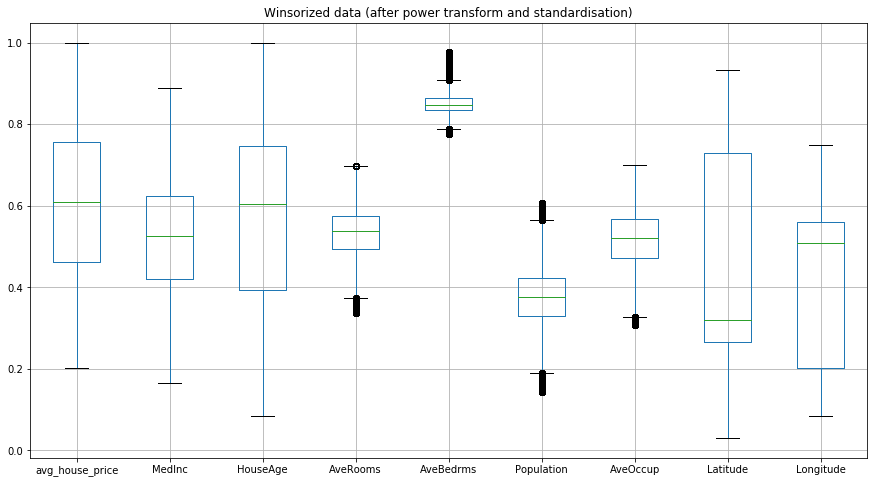

In [0]:
df_powerTransform_scaledAndWinsorized = df_powerTransform_scaled.clip(lower=df_powerTransform_scaled.quantile(0.01), upper=df_powerTransform_scaled.quantile(0.99), axis=1)
df_powerTransform_scaledAndWinsorized.boxplot(figsize = (15,8))
plt.title('Winsorized data (after power transform and standardisation)')

Feature Generation


In [0]:
#rates of changes over time
#Ratios of features
#combinations of features that are meaningful (e.g distance)

**Categorical Features**



Data

In [0]:
titanic_url = ('https://raw.githubusercontent.com/amueller/''scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
data = pd.read_csv(titanic_url)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [0]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Split Categorical Features

In [0]:
numeric_features = data.select_dtypes(include='number', exclude = None).drop(columns = ['sibsp','parch','pclass','survived']).columns
#data types = 'number', 'bool', 'object' (strings), 'category', 'datetime'

#categoric_data = pd.concat([data.select_dtypes(exclude = ['number', 'bool']),data[['pclass','sibsp','parch']]], axis=1)
categoric_features = ['pclass','sex','sibsp','parch'] #remove ticket because it makes it too sparse - good idea?

data[categoric_features]


,pclass,sex,sibsp,parch
0,1,female,0,0
1,1,male,1,2
2,1,female,1,2
3,1,male,1,2
4,1,female,1,2
...,...,...,...,...
1304,3,female,1,0
1305,3,female,1,0
1306,3,male,0,0
1307,3,male,0,0



Preprocessing

In [0]:
#One hot encodings (Linear methods)
data_categories = data[categoric_features]
data_OneHotencoded = pd.concat([pd.get_dummies(df_categoeries[col]) for col in data_categories], axis=1, keys=data_categories.columns)
# pd.get_dummies(data[categoric_features])doesn't work??


#Label encoding (Tree methods)
data_LabelEncoded = data_categories.apply(sklearn.preprocessing.LabelEncoder().fit_transform)

data_LabelEncoded

pclass          sex      sibsp           ...    parch                     
          1  2  3 female male     0  1  2  3  ...  8     0  1  2  3  4  5  6  9
0         1  0  0      1    0     1  0  0  0  ...  0     1  0  0  0  0  0  0  0
1         1  0  0      0    1     0  1  0  0  ...  0     0  0  1  0  0  0  0  0
2         1  0  0      1    0     0  1  0  0  ...  0     0  0  1  0  0  0  0  0
3         1  0  0      0    1     0  1  0  0  ...  0     0  0  1  0  0  0  0  0
4         1  0  0      1    0     0  1  0  0  ...  0     0  0  1  0  0  0  0  0
...     ... .. ..    ...  ...   ... .. .. ..  ... ..   ... .. .. .. .. .. .. ..
1304      0  0  1      1    0     0  1  0  0  ...  0     1  0  0  0  0  0  0  0
1305      0  0  1      1    0     0  1  0  0  ...  0     1  0  0  0  0  0  0  0
1306      0  0  1      0    1     1  0  0  0  ...  0     1  0  0  0  0  0  0  0
1307      0  0  1      0    1     1  0  0  0  ...  0     1  0  0  0  0  0  0  0
1308      0  0  1      0    1     1  0  0  0  ...  0     1  0  0  0  0  0  0  0

[1309 rows x 20 columns]

Feature Generation

In [0]:
#Frequency encoding (both Linear & Tree) - good if belief for correlation between frequency of a variable and target value
def frequency_encoder(df, column_name):
  encoding = df.groupby(column_name).size()
  encoding = encoding/len(df)
  df['Freq_' + column_name] = df[column_name].map(encoding)
  return df

data_FreqEncoded = [frequency_encoder(data_categories, column) for column in data_categories][0]
data_FreqEncoded

#Interaction between features?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,pclass,sex,sibsp,parch,Freq_pclass,Freq_sex,Freq_sibsp,Freq_parch
0,1,female,0,0,0.246753,0.355997,0.680672,0.765470
1,1,male,1,2,0.246753,0.644003,0.243697,0.086325
2,1,female,1,2,0.246753,0.355997,0.243697,0.086325
3,1,male,1,2,0.246753,0.644003,0.243697,0.086325
4,1,female,1,2,0.246753,0.355997,0.243697,0.086325
...,...,...,...,...,...,...,...,...
1304,3,female,1,0,0.541635,0.355997,0.243697,0.765470
1305,3,female,1,0,0.541635,0.355997,0.243697,0.765470
1306,3,male,0,0,0.541635,0.644003,0.680672,0.765470
1307,3,male,0,0,0.541635,0.644003,0.680672,0.765470


**Date Time Features**

Data

In [0]:
#Periodicity (No of day within week/month)
#Difference between dates - generally or Time since event (row independent/dependent event)
"""
from google.colab import files
uploaded = files.upload()
"""

import io
df_dates = pd.read_csv(io.BytesIO(uploaded['test.csv']))
df_dates

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


Preprocessing

In [0]:
#Turn to date format
df_dates['Date'] = pd.to_datetime(df_dates['Date'])

Feature Generation

In [0]:
#Periodicity

#Day of week
df_dates['day_of_week'] = df_dates['Date'].dt.dayofweek

#month of year
df_dates['month_of_year'] = df_dates['Date'].dt.month

#Is holiday - include weekends? 
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=df_dates['Date'].min(), end=df_dates['Date'].max())

df_dates['Holiday'] = df_dates['Date'].isin(holidays)
df_dates


#Extra possibilities
"""
- Weekend + holidays in one dummy variable

"""

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,day_of_week,month_of_year,Holiday
0,1,1,4,2015-09-17,1.0,1,0,0,3,9,False
1,2,3,4,2015-09-17,1.0,1,0,0,3,9,False
2,3,7,4,2015-09-17,1.0,1,0,0,3,9,False
3,4,8,4,2015-09-17,1.0,1,0,0,3,9,False
4,5,9,4,2015-09-17,1.0,1,0,0,3,9,False
...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,5,8,False
41084,41085,1112,6,2015-08-01,1.0,0,0,0,5,8,False
41085,41086,1113,6,2015-08-01,1.0,0,0,0,5,8,False
41086,41087,1114,6,2015-08-01,1.0,0,0,0,5,8,False


In [0]:
#Day since event (e.g 1) Important event (row independent if not recurring), 2) Dates till holiday/date after holiday (row dependent))
#Difference btween dates (e.g. last purchase date and last call date)) 

**Text Data**

In [0]:
#Bag of Words
#Word2Vec

**Merging Data** (both different data categories and differently pre-processed)


In [0]:
#Differently pre-processed - can include in one trainining dataset, or train a few models on differently processed data and take average. Or pre-processing can act as a hyper parameter

**Further to do**

In [0]:
#EDA - Correlation maps
#Feature Selection - Random Forest Variable importance, PCA?
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
